In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

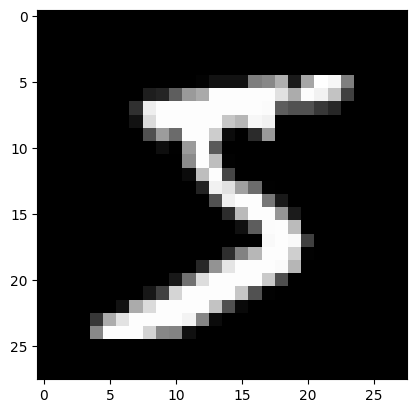

In [3]:
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [4]:
LATENT_SIZE = 32

In [5]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

2023-09-27 18:15:00.063946: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 18:15:01.774561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30989 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:18:00.0, compute capability: 7.0


In [6]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [7]:
img = Input(shape = (28, 28))

In [8]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [9]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [10]:
EPOCHS = 60

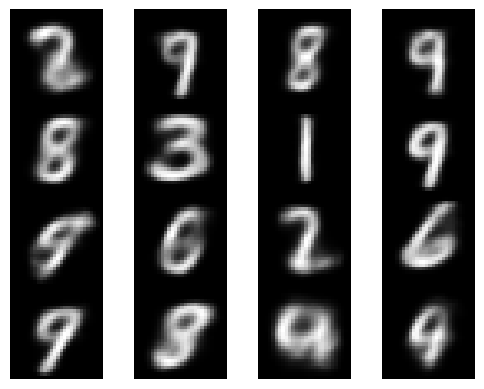

----------- EPOCH 59 -----------
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1904


In [11]:
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)

In [12]:
x_train_latent = encoder.predict(x_train)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE().fit_transform(x_train_latent)

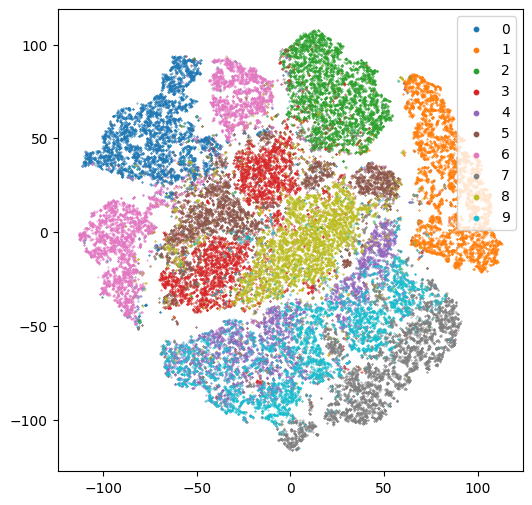

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(10):
    indices = np.where(y_train == i)
    ax.scatter(tsne[indices,0], tsne[indices,1], s=.1, label=i)

ax.legend(loc='upper right', markerscale=10)

In [16]:
import umap

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
u = umap.UMAP().fit_transform(x_train_latent)

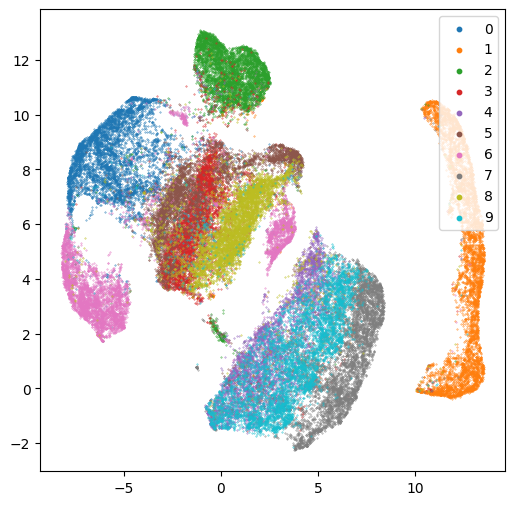

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(10):
    indices = np.where(y_train == i)
    ax.scatter(u[indices,0], u[indices,1], s=.1, label=i)

ax.legend(loc='upper right', markerscale=10)